**Alunos: 
Jefferson Costa, 
Sávio Berdine, 
Amanda Lasserre,
Kevin Andrews,
Nicholas Henrique.**

In [1]:
#-*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv("College.csv")
#No dataSet original, temos colunas com os nomes separados com um ".", por exemplo, Grad.Rate, e isso estava nos dando alguns problemas, então resolvemos renomear as colunas e trocar esse "." por um "_"
data = data.rename(columns={'Unnamed: 0':'College name','F.Undergrad':'F_Undergrad','P.Undergrad':'P_Undergrad','Room.Board':'Room_Board','S.F.Ratio':'S_F_Ratio','perc.alumni':'perc_alumni','Grad.Rate':'Grad_Rate'})
data.head()

,College name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
data.drop(["College name"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

**Os dados que serão utilizados**<br>
    **Private** A factor with levels No and Yes indicating private or public university     
    **Apps** Number of applications received     
    **Accept** Number of applications accepted     
    **Enroll Number** of new students enrolled     
    **Top10perc** Pct. new students from top 10% of H.S. class     
    **Top25perc** Pct. new students from top 25% of H.S. class     
    **F_Undergrad** Number of fulltime undergraduates     
    **P_Undergrad** Number of parttime undergraduates     
    **Outstate** Out-of-state tuition     
    **Room_Board** Room and board costs     
    **Books** Estimated book costs     
    **Personal** Estimated personal spending     
    **PhD Pct.** of faculty with Ph.D.’s     
    **Terminal Pct.** of faculty with terminal degree     
    **S_F_Ratio** Student/faculty ratio     
    **perc_alumni** Pct. alumni who donate     
    **Expend Instructional** expenditure per student     
    **Grad_Rate** Graduation rate<br>
**Observe que temos 18 variáveis**

### **Explorando o banco de dados**

**Uma comparação entre o número de estudantes "fulltime" e "parttime" de universidade privadas e universidades públicas.**

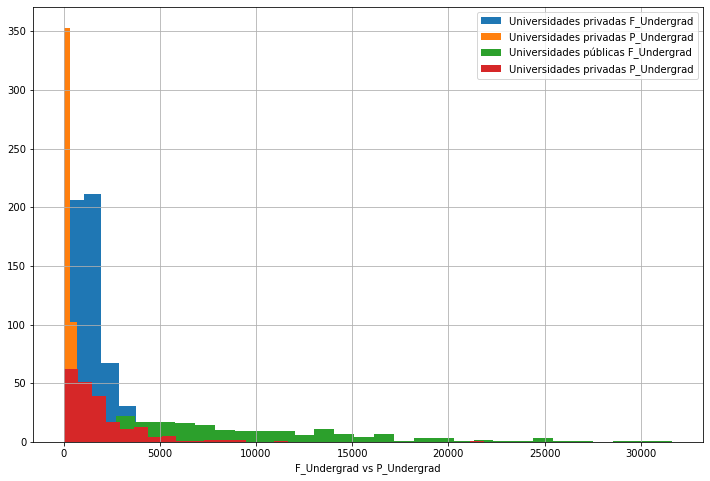

In [4]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'F_Undergrad'].hist(label="Universidades privadas F_Undergrad", bins=30)
data.loc[data.Private == 'Yes', 'P_Undergrad'].hist(label="Universidades privadas P_Undergrad", bins=30)
data.loc[data.Private == 'No', 'F_Undergrad'].hist(label="Universidades públicas F_Undergrad", bins=30)
data.loc[data.Private == 'No', 'P_Undergrad'].hist(label="Universidades privadas P_Undergrad", bins=30)

plt.xlabel('F_Undergrad vs P_Undergrad')
plt.legend()


In [5]:
result = data['Private'].value_counts()
print(result)

Yes    565
No     212
Name: Private, dtype: int64


**Uma comparação entre a taxa de graduação em universidades privadas e universidades públicas**

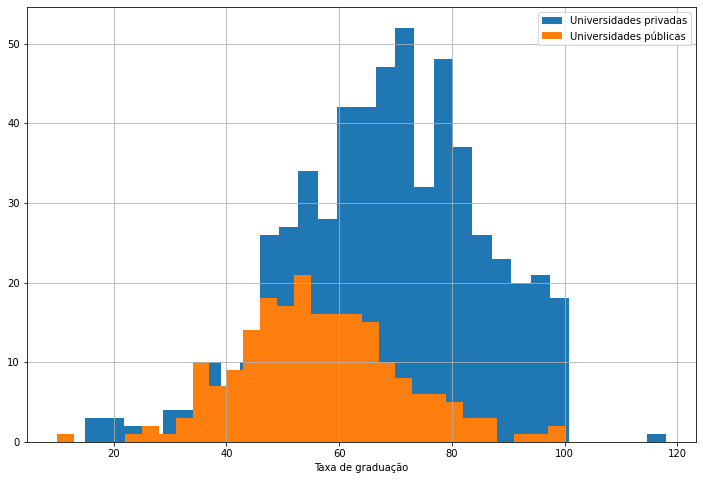

In [6]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Grad_Rate'].hist(label="Universidades privadas", bins=30)
data.loc[data.Private == 'No', 'Grad_Rate'].hist(label="Universidades públicas", bins=30)

plt.xlabel('Taxa de graduação')
plt.legend()

Ao analisar o histograma, percebemos que tem uma universidade com uma taxa de graduação acima de 100%. Temos que saber qual é essa universidade e "setar" que a taxa de graduação é de 100%, pois isso faz mais sentido para nossa análise.


In [7]:
data.loc[data.Grad_Rate > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Ao fazer a busca, temos que a *Cazenovia College* é a universidade pela qual estamos procurando, então iremos 'setar' a taxa de graduação dela pra 100%.


In [8]:
data.loc[data.Grad_Rate > 100, 'Grad_Rate'] = 100

**E agora faremos a comparação novamente**

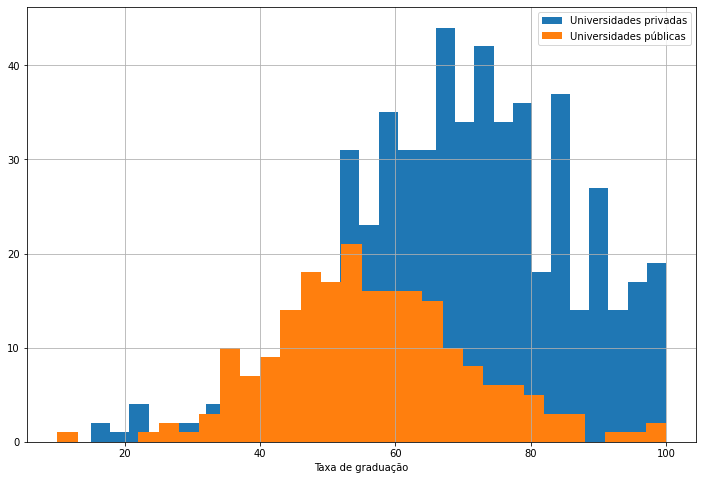

In [9]:
plt.figure(figsize=(12, 8))

data.loc[data.Private == 'Yes', 'Grad_Rate'].hist(label="Universidades privadas", bins=30)
data.loc[data.Private == 'No', 'Grad_Rate'].hist(label="Universidades públicas", bins=30)

plt.xlabel('Taxa de graduação')
plt.legend()

### Experimentos:

#### Para os experimentos serão utilizados os seguintes parâmetros da função "*KMeans*": *n_clusters, init, n_init, max_iter e random_state*.

*n_clusters*: Número de centróides que serão gerados. Padrão = 8.

*init*: Método para inicialização. Pode ser do tipo "*k_means++*", onde seleciona de maneira inteligente os centróides iniciais para acelerar a convergência, e do tipo "*random*", onde é escolhido aleatoriamente "*n_clusters*" linhas do banco de dados para serem os centróides iniciais. Padrão = "*k_means++*".

*n_init*: Número de vezes que o algoritmo K-Means executará com diferentes centróides iniciais. Padrão = 10.

*max_iter*: Número máximo de iterações que o algoritmo K-Means irá executar. Padrão = 300.

*random_state*: Número aleatório para geração inicial dos centróides. Padrão = *None*.

In [10]:
#Transformando a columa em 1 pra yes e 0 pra no
data['Private'].replace(['Yes','No'],[1,0],inplace=True)

In [11]:
#selecionando apenas as colunas com valores numéricos
X = data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values

**Criando uma instância do k-means com k = 2**

In [12]:
kmeans = KMeans(n_clusters = 2)
#ajustando o k-means
y_kmeans = kmeans.fit_predict(X)

In [13]:
print(classification_report(data.Private, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Com esssa primeira instância do K-means, com o K = 2, não obtivemos um resultado muito bom. Faremos outros experimentos, para verificar o que acontece com o *precision*, *recall* e *accuracy*.

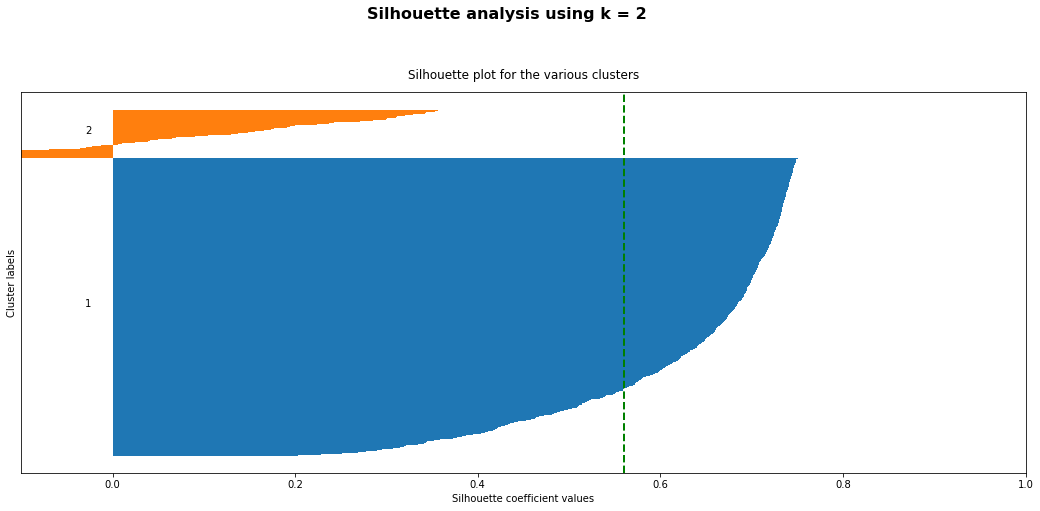

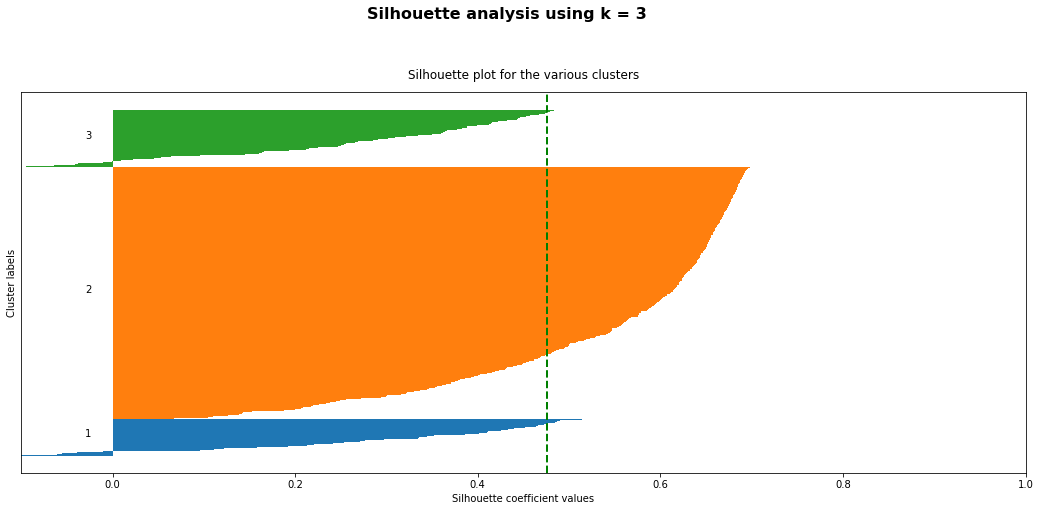

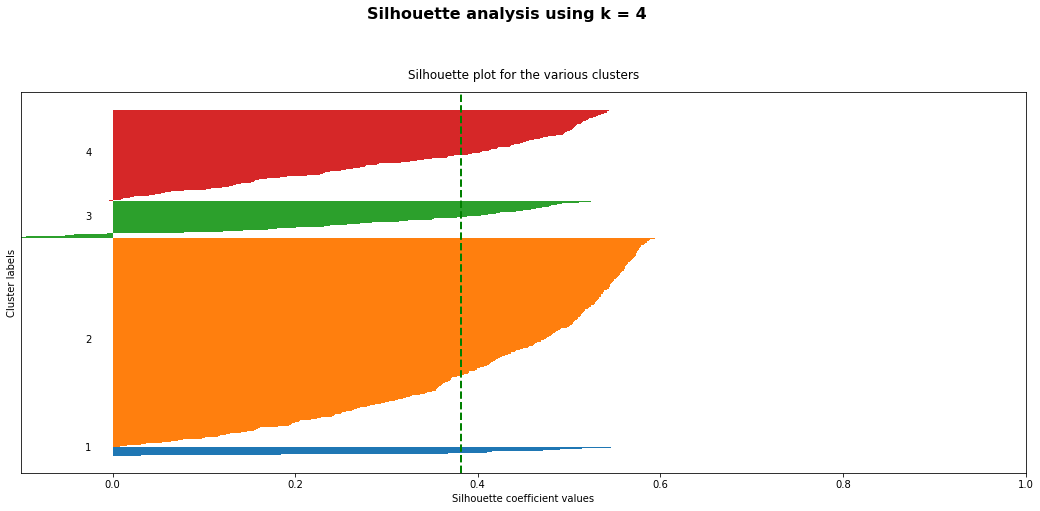

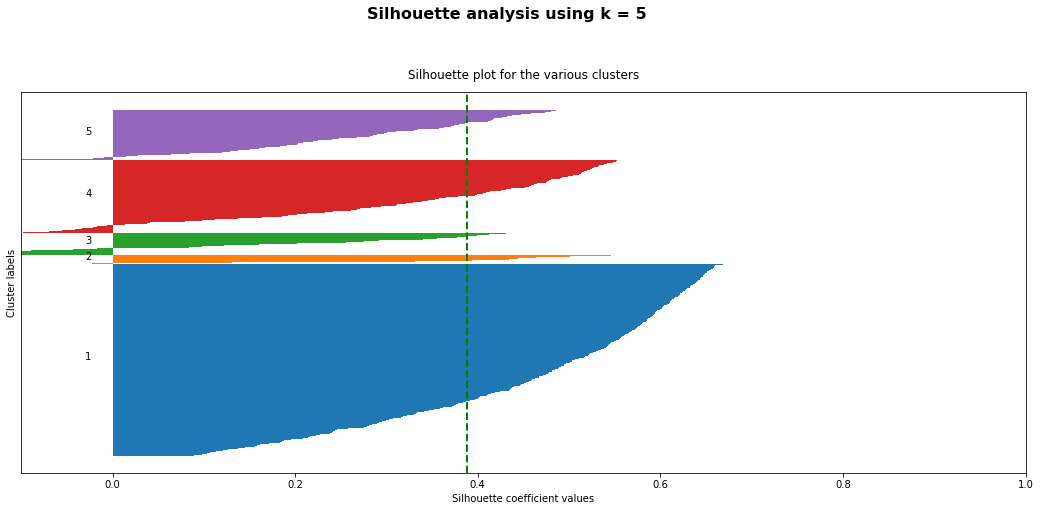

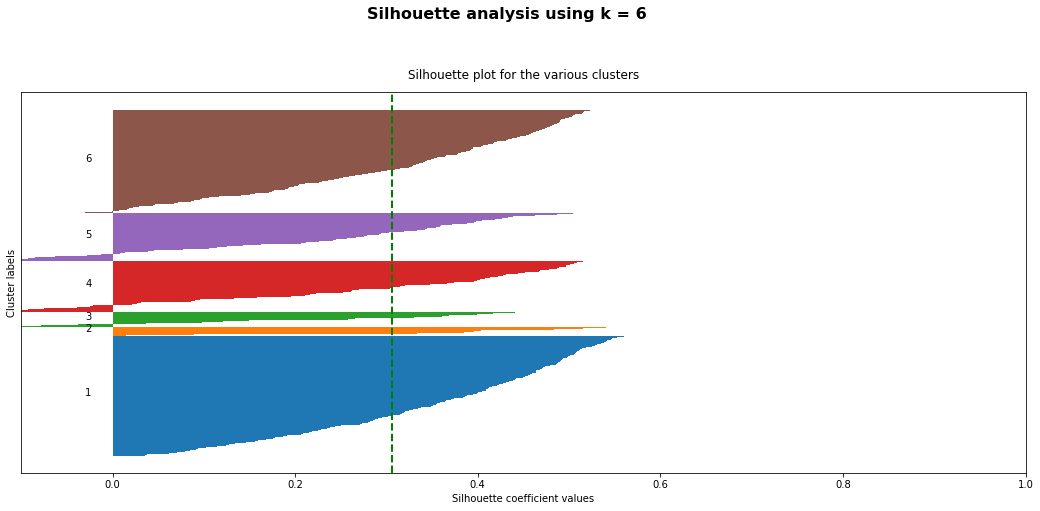

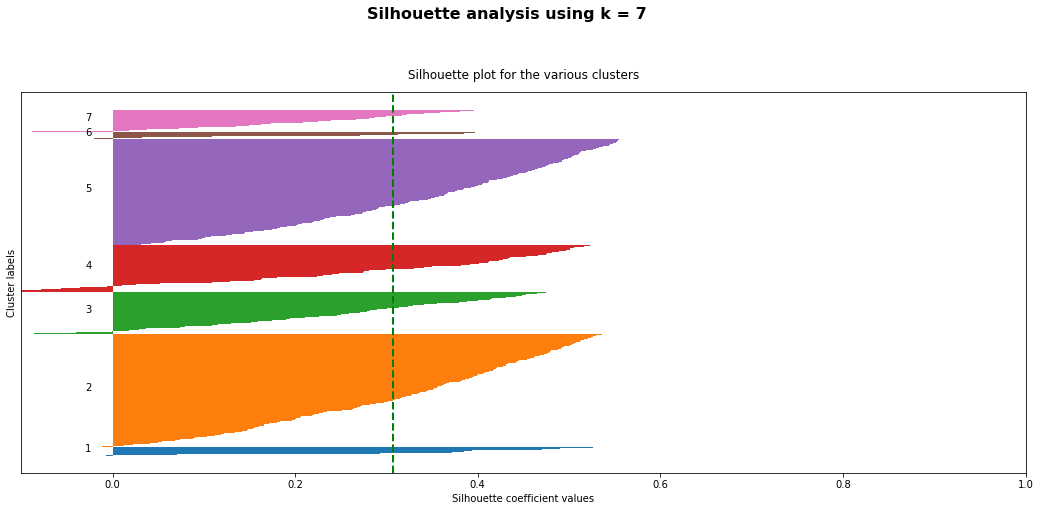

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
# data_investigation = pd.read_csv("College.csv")
# #No dataSet original, temos colunas com os nomes separados com um ".", por exemplo, Grad.Rate, e isso estava nos dando alguns problemas, então resolvemos renomear as colunas e trocar esse "." por um "_"
# data_investigation = data_investigation.rename(columns={'Unnamed: 0':'College name','F.Undergrad':'F_Undergrad','P.Undergrad':'P_Undergrad','Room.Board':'Room_Board','S.F.Ratio':'S_F_Ratio','perc.alumni':'perc_alumni','Grad.Rate':'Grad_Rate'})
# #Removendo a coluna que classifica as universidades
# data_investigation.drop('Private', axis='columns', inplace=True)
# X = data_investigation.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values
for i, k in enumerate([2, 3, 4, 5, 6, 7]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    plt.tight_layout
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Consideramos que a quantidade de clusters ideal tem todos os clusters acima da média do silhouette score e um silhouette socore médio acima de 0.5. Fica claro que com dois clusters o silhouette socore médio tem o melhor resultado, ficando próximo a 0.6, entretanto um dos clusters tem o score sempre menor que a média, o que não é o ideal. Mais investigação deve ser feita sobre o data set.

#### Para os experimentos também serão utilizados os seguintes parâmetros da função "*train_test_split*": *train_size* e *random_state*.

*train_size*: Representa a porcentagem do banco de dados utilizada para treinamento, o restante fica alocado para teste. Padrão: *None*.

*random_state*: Número para aleatorizar as observações selecionadas do banco de dados *x* e *y*. Padrão: *None*.

In [15]:
x = data.drop(['Private'],axis=1)
y = data["Private"]
y.value_counts()

1    565
0    212
Name: Private, dtype: int64

#### Variando *train_size*:

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.50, random_state=None)
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.35732647814910024
              precision    recall  f1-score   support

           0       0.86      0.17      0.29       104
           1       0.97      0.42      0.59       285
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.36       389
   macro avg       0.26      0.09      0.13       389
weighted avg       0.94      0.36      0.51       389



c:\users\jeff\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jeff\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jeff\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Obtiveram-se esses *warnings* pois como foi passado *n_clusters=8*, o algoritmo "*KMeans*" tentará segregar o banco de dados que o foi passado em 8 diferentes classificações, entretanto o banco de dados utilizado possui apenas 2 classificações, "1" para faculadade privada e "0" para faculdade pública, logo, deve-se utilizar *n_clusters=2* para os experimentos.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.50, random_state=None)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.2262210796915167
              precision    recall  f1-score   support

           0       0.20      0.66      0.31       102
           1       0.38      0.07      0.12       287

    accuracy                           0.23       389
   macro avg       0.29      0.37      0.22       389
weighted avg       0.33      0.23      0.17       389



In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=None)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.7588424437299035
              precision    recall  f1-score   support

           0       0.69      0.27      0.39        88
           1       0.77      0.95      0.85       223

    accuracy                           0.76       311
   macro avg       0.73      0.61      0.62       311
weighted avg       0.74      0.76      0.72       311



In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=None)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8
              precision    recall  f1-score   support

           0       0.76      0.32      0.45        50
           1       0.80      0.97      0.88       145

    accuracy                           0.80       195
   macro avg       0.78      0.64      0.66       195
weighted avg       0.79      0.80      0.77       195



*train_size=0.75* apresentou o melhor resultado.

#### Variando *random_state* de *train_test_split*:

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=1)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.23076923076923078
              precision    recall  f1-score   support

           0       0.21      0.71      0.32        51
           1       0.38      0.06      0.11       144

    accuracy                           0.23       195
   macro avg       0.29      0.38      0.22       195
weighted avg       0.33      0.23      0.16       195



In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=15)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.7743589743589744
              precision    recall  f1-score   support

           0       0.73      0.38      0.50        58
           1       0.78      0.94      0.85       137

    accuracy                           0.77       195
   macro avg       0.76      0.66      0.68       195
weighted avg       0.77      0.77      0.75       195



In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.21025641025641026
              precision    recall  f1-score   support

           0       0.21      0.59      0.31        58
           1       0.23      0.05      0.08       137

    accuracy                           0.21       195
   macro avg       0.22      0.32      0.19       195
weighted avg       0.22      0.21      0.15       195



O *random_state=0* apresentou os melhores resultados.

#### Variando *init*:

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="random", n_init=10, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



Obtiveram-se os mesmos resultados.

#### Variando *n_init*:

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=5, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=15, max_iter=300, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



A alteração de *n_init* não proporcionou uma melhora no resultado.

#### Variando *max_iter*:

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=50, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=100, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=400, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=500, random_state = None)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.8051282051282052
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        53
           1       0.81      0.96      0.88       142

    accuracy                           0.81       195
   macro avg       0.80      0.67      0.70       195
weighted avg       0.80      0.81      0.78       195



Um aumento no valor de *max_iter* resultou em uma piora dos resultados.

#### Variando *random_state* da função "*KMeans*":

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = 0)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = 1)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = 15)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = 42)
kmeans.fit(x_train)
predicted = kmeans.predict(x_test)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test,predicted))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



Os resultados de *random_state=None* apresentaram-se os melhores entre os testados. O valor *None* significa que será usado a instância de estado aleatório global de *numpy.random*.

Portanto, os melhores resultados foram obtidos quando foram utilizados os parâmetros: *train_size=0.75*, *random_state* de *train_test_split* igual a 0 e *n_clusters=2*, *init=k-means++*, *n_init=10*, *max_iter=300* e *random_state* de *KMeans* igual a *None*.

### Tenta-se agora descobrir quais são as melhores variáveis para utilizar no banco de dados para tentar maximizar os resultados.

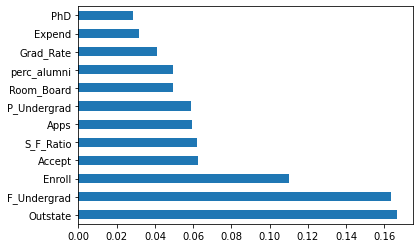

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Irão ser utilizados somente as colunas "*F.Undergrad*", "*Outstate*" e "*Enroll*".

In [36]:
data2 = pd.read_csv("College.csv")
data2.drop(["Unnamed: 0", "Top10perc", "Expend", "Grad.Rate", "P.Undergrad", "Room.Board", "perc.alumni", "Accept", "Apps", "S.F.Ratio"], axis=1, inplace=True)
data2["Private"].replace(["Yes", "No"], [1,0], inplace=True)
x2 = data.drop(['Private'],axis=1)
y2 = data["Private"]

### Realiza-se o experimento com os melhores parâmetros que foram obtidos anteriormente:

In [37]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.75, random_state=0)
kmeans2 = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=300, random_state = None)
kmeans2.fit(x2_train)
predicted2 = kmeans.predict(x2_test)
print(accuracy_score(y2_test, predicted2))
print(classification_report(y2_test,predicted2))

0.19487179487179487
              precision    recall  f1-score   support

           0       0.19      0.62      0.30        53
           1       0.20      0.04      0.06       142

    accuracy                           0.19       195
   macro avg       0.20      0.33      0.18       195
weighted avg       0.20      0.19      0.12       195



Infelizmente com esse novo banco de dados não foi possível melhorar os resultados.